##Preprocessing:

Importing the required libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Importing the selected datasets as dataframes:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dailyActivity_merged.csv to dailyActivity_merged.csv
Saving hourlyCalories_merged.csv to hourlyCalories_merged.csv
Saving hourlyIntensities_merged.csv to hourlyIntensities_merged.csv
Saving hourlySteps_merged.csv to hourlySteps_merged.csv
Saving sleepDay_merged.csv to sleepDay_merged.csv
Saving weightLogInfo_merged.csv to weightLogInfo_merged.csv


In [ ]:
activity = pd.read_csv("dailyActivity_merged.csv")
calories = pd.read_csv("hourlyCalories_merged.csv")
intensities = pd.read_csv("hourlyIntensities_merged.csv")
steps = pd.read_csv("hourlySteps_merged.csv")
sleep = pd.read_csv("sleepDay_merged.csv")
weight = pd.read_csv("weightLogInfo_merged.csv")

In [ ]:
print("Size of Activity Dataframe:", activity.shape)
print("Size of Calories Dataframe:", calories.shape)
print("Size of Intensities Dataframe:", intensities.shape)
print("Size of Steps Dataframe:", steps.shape)
print("Size of Sleep Dataframe:", sleep.shape)
print("Size of Weight Dataframe:", weight.shape)

Size of Activity Dataframe: (940, 15)
Size of Calories Dataframe: (22099, 3)
Size of Intensities Dataframe: (22099, 4)
Size of Steps Dataframe: (22099, 3)
Size of Sleep Dataframe: (413, 5)
Size of Weight Dataframe: (67, 8)


Removing duplicates in all the dataframes:

In [ ]:
activity = activity.drop_duplicates()
calories = calories.drop_duplicates()
intensities = intensities.drop_duplicates()
steps = steps.drop_duplicates()
sleep = sleep.drop_duplicates()
weight = weight.drop_duplicates()

Checking for null values in all the dataframes:

In [ ]:
activity.isnull().any()

Id                          False
ActivityDate                False
TotalSteps                  False
TotalDistance               False
TrackerDistance             False
LoggedActivitiesDistance    False
VeryActiveDistance          False
ModeratelyActiveDistance    False
LightActiveDistance         False
SedentaryActiveDistance     False
VeryActiveMinutes           False
FairlyActiveMinutes         False
LightlyActiveMinutes        False
SedentaryMinutes            False
Calories                    False
dtype: bool

In [ ]:
calories.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

In [ ]:
intensities.isnull().any()

Id                  False
ActivityHour        False
TotalIntensity      False
AverageIntensity    False
dtype: bool

In [ ]:
steps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

In [ ]:
sleep.isnull().any()

Id                    False
SleepDay              False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
dtype: bool

None of the above dataframes have null values. The only null values exist within "weight" dataframe's "fat" column. 

In [ ]:
weight.isnull().any()

Id                False
Date              False
WeightKg          False
WeightPounds      False
Fat                True
BMI               False
IsManualReport    False
LogId             False
dtype: bool

Let's see how many null values there are:

In [ ]:
weight["Fat"].isna().sum()

65

There are only observations within this column containing data. Let's drop the column:

In [ ]:
weight = weight.drop("Fat", axis = 1)

In [ ]:
weight.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,21.690001,True,1463097599000


Kaggle's description of this dataset mentions that around 30 individuals were surveyed for their fitbit information. Let's see if this is consistent across all datasets by checking for the number of unique IDs.

In [ ]:
print("Number of unique IDs in:\n")
print("Activity Dataframe:\t", activity["Id"].nunique())
print("Calories Dataframe:\t", calories["Id"].nunique())
print("Intensities Dataframe:\t", intensities["Id"].nunique())
print("Steps Dataframe:\t", steps["Id"].nunique())
print("Sleep Dataframe:\t", sleep["Id"].nunique())
print("Weight Dataframe:\t", weight["Id"].nunique())

Number of unique IDs in:

Activity Dataframe:	 33
Calories Dataframe:	 33
Intensities Dataframe:	 33
Steps Dataframe:	 33
Sleep Dataframe:	 24
Weight Dataframe:	 8


* The activity, calories, intensities, and steps dataframes contain the data for 33 individuals. 
* However, the sleep and weight dataframes contain data for less than 30 individuals. 
* Predictions made using sample sizes as small as 8 tend to yield misleading results, so we will not be using the "Weight" dataframe any further 
in this case study.

Observing the columns of each dataframe:

In [ ]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 690.6+ KB


In [ ]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 690.6+ KB


In [ ]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 863.2+ KB


In [ ]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  410 non-null    int64 
 1   SleepDay            410 non-null    object
 2   TotalSleepRecords   410 non-null    int64 
 3   TotalMinutesAsleep  410 non-null    int64 
 4   TotalTimeInBed      410 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.2+ KB


Changing all the date and hour columns to date-time type:

In [ ]:
activity["ActivityDate"] = pd.to_datetime(activity["ActivityDate"])
calories["ActivityHour"] = pd.to_datetime(calories["ActivityHour"])
steps["ActivityHour"] = pd.to_datetime(steps["ActivityHour"])
intensities["ActivityHour"] = pd.to_datetime(intensities["ActivityHour"])
sleep["SleepDay"] = pd.to_datetime(sleep["SleepDay"])

Splitting the date-time columns into separate date and time columns:

In [ ]:
activity = activity.rename(columns={'ActivityDate': 'Date'})

In [ ]:
calories["Date"] = pd.to_datetime(calories["ActivityHour"]).dt.date
calories["Time"] = pd.to_datetime(calories["ActivityHour"]).dt.time
calories = calories.drop("ActivityHour", axis = 1)

In [ ]:
steps["Date"] = pd.to_datetime(steps["ActivityHour"]).dt.date
steps["Time"] = pd.to_datetime(steps["ActivityHour"]).dt.time
steps = steps.drop("ActivityHour", axis = 1)

In [ ]:
intensities["Date"] = pd.to_datetime(intensities["ActivityHour"]).dt.date
intensities["Time"] = pd.to_datetime(intensities["ActivityHour"]).dt.time
intensities = intensities.drop("ActivityHour", axis = 1)

In [ ]:
sleep["Date"] = pd.to_datetime(sleep["SleepDay"]).dt.date
sleep["Time"] = pd.to_datetime(sleep["SleepDay"]).dt.time
sleep = sleep.drop("SleepDay", axis = 1)

In [ ]:
sleep["Date"] = pd.to_datetime(sleep["Date"])

* The "Sleep" and "Activity" dataframes have daily data, while the other three dataframe have hourly data. 
* Let's combine the "Sleep" and "Activity" dataframes together.
* The "Sleep" dataframe only contains 28 individuals' data, while the other four dataframes contain that of 33 individuals. 
* We can ensure consistency here by performing an inner join.

In [ ]:
activity.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
activity_and_sleep = pd.merge(activity, sleep, how="inner", on=["Date", "Id"])
activity_and_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Time
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,00:00:00
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,00:00:00
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,00:00:00
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,00:00:00
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,00:00:00


To make the data more digestible, we present the amount slept in terms of hours rather than minutes:

In [ ]:
activity_and_sleep["TotalHoursAsleep"] = activity_and_sleep["TotalMinutesAsleep"]/60

In [ ]:
activity_and_sleep.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Time,TotalHoursAsleep
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,00:00:00,5.450000
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,00:00:00,6.400000
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,00:00:00,6.866667
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,00:00:00,5.666667
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,00:00:00,11.666667


##Analysis:

###Analyzing Calories:

Let's see if the calories are tracked on a regular basis:

In [ ]:
calories.head()

,Id,Calories,Date,Time
0,1503960366,81,2016-04-12,00:00:00
1,1503960366,61,2016-04-12,01:00:00
2,1503960366,59,2016-04-12,02:00:00
3,1503960366,47,2016-04-12,03:00:00
4,1503960366,48,2016-04-12,04:00:00


In [ ]:
calories["Time"].value_counts()

00:00:00    934
01:00:00    933
02:00:00    933
03:00:00    933
04:00:00    932
05:00:00    932
06:00:00    931
07:00:00    931
08:00:00    931
09:00:00    931
10:00:00    929
11:00:00    927
12:00:00    922
13:00:00    921
14:00:00    921
15:00:00    915
16:00:00    907
17:00:00    906
18:00:00    906
19:00:00    906
20:00:00    906
21:00:00    905
22:00:00    904
23:00:00    903
Name: Time, dtype: int64

* As seen above, calories are tracked on an hourly basis almost consistently.
* Let's find the average calories consumed on an hourly basis:

In [ ]:
avg_calories = calories
avg_calories = avg_calories.groupby("Time", as_index=False).mean()
avg_calories['Time'] = pd.to_datetime(avg_calories['Time'], format='%H:%M:%S').dt.strftime('%I:%M%P')

In [ ]:
avg_calories = calories

In [ ]:
avg_calories = avg_calories.groupby("Time", as_index=False).mean()

In [ ]:
avg_calories.head()

,Time,Id,Calories
0,00:00:00,4.846554e+09,71.805139
1,01:00:00,4.844238e+09,70.165059
2,02:00:00,4.844238e+09,69.186495
3,03:00:00,4.844238e+09,67.538049
4,04:00:00,4.844801e+09,68.261803


In [ ]:
avg_calories['Time'] = pd.to_datetime(avg_calories['Time'], format='%H:%M:%S').dt.strftime('%I:%M%P')

In [ ]:
avg_calories.head()

,Time,Id,Calories
0,12:00am,4.846554e+09,71.805139
1,01:00am,4.844238e+09,70.165059
2,02:00am,4.844238e+09,69.186495
3,03:00am,4.844238e+09,67.538049
4,04:00am,4.844801e+09,68.261803


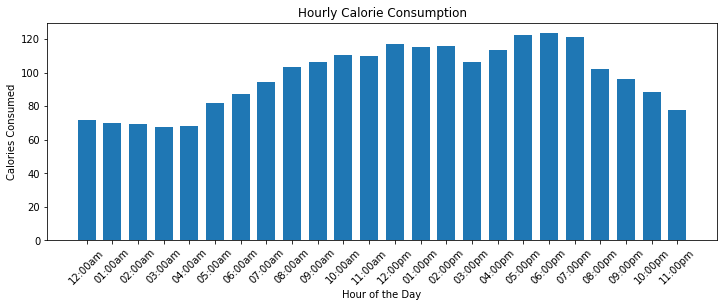

In [ ]:
plot_hourly_calories = plt.figure(figsize=(12, 4))
plot_hourly_calories= plt.bar(avg_calories["Time"], avg_calories["Calories"], width = 0.7)
plt.title("Hourly Calorie Consumption")
plt.ylabel("Calories Consumed")
plt.xlabel("Hour of the Day")
plt.xticks(rotation=45)
plt.show()

* As seen above, most people tend to consume the majority of their daily caloric intake between 12PM and 7PM.


Illustrating the daily calorie consumption:

In [ ]:
calories['Date'] = pd.to_datetime(calories['Date'])
calories["Day"] = pd.to_datetime(calories['Date']).dt.day

In [ ]:
total_calories = calories.groupby(["Day", "Id"], as_index=False).sum()

In [ ]:
total_calories.head()

,Day,Id,Calories
0,1,1503960366,1828
1,1,1624580081,2692
2,1,1644430081,2690
3,1,1844505072,1539
4,1,1927972279,2411


* The National Health Service recommends that women's daily calorie intake be around 2000 calories, and men's daily calorie intake be around 2500 calories.
* Information regarding the individuals' sexes are not displayed here, so we cannot make any generalizations for calorie intake based on gender.
* However, as supported by the high standard deviation value, daily calorie intake greatly varies amongst the 30 individuals surveyed, from 65 calories (way below the recommended amount), to 5687 (more than twice as much as the recommended amount). This means that consumers face difficulty in maintaining consistency.
* We do not have sufficient data to determine why or discover patterns in eating habits, but it is possible that people have different dietary goals depending on their age, gender, activity levels, personal preferences, etc. 
* Bellabeat can ask if the consumers would like to specify a daily dietary goal. Based on this, Bellabeat can introduce a notification feature that periodically reminds consumers who are not meeting these goals to eat on time, or help consumers create meal plans that assist with this. 

In [ ]:
total_calories["Calories"].describe()

count     915.000000
mean     2352.076503
std       708.429884
min        65.000000
25%      1848.000000
50%      2174.000000
75%      2805.500000
max      5687.000000
Name: Calories, dtype: float64

###Analyzing Steps:

In [ ]:
steps.head()
steps['Date'] = pd.to_datetime(steps['Date'])
steps["Day"] = pd.to_datetime(steps['Date']).dt.day

In [ ]:
avg_steps = steps
avg_steps = avg_steps.groupby("Time", as_index=False).mean()
avg_steps['Time'] = pd.to_datetime(avg_steps['Time'], format='%H:%M:%S').dt.strftime('%I:%M%P')
avg_steps.head()

,Time,Id,StepTotal,Day
0,12:00am,4.846554e+09,42.188437,15.797645
1,01:00am,4.844238e+09,23.102894,15.807074
2,02:00am,4.844238e+09,17.110397,15.807074
3,03:00am,4.844238e+09,6.426581,15.807074
4,04:00am,4.844801e+09,12.699571,15.811159


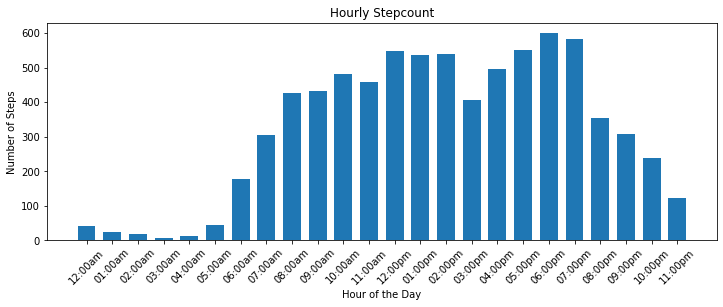

In [ ]:
plot_hourly_steps = plt.figure(figsize=(12, 4))
plot_hourly_steps= plt.bar(avg_steps["Time"], avg_steps["StepTotal"], width = 0.7)
plt.title("Hourly Stepcount")
plt.ylabel("Number of Steps")
plt.xlabel("Hour of the Day")
plt.xticks(rotation=45)
plt.show()

* As seen above, most people walk the most between the hours of 12PM and 7PM. This is similar to the trend we saw for calorie consumption as well.
* These trends may have to do with the 9-5 worklife that consumers may lead. Consumers may want to eat, exercise, or do both within the two hours following their workshift.
* We can use this information and the aforementioned notification system to remind consumers to go for a daily walk around 5PM.

In [ ]:
steps['Date'] = pd.to_datetime(steps['Date'])
steps["Day"] = pd.to_datetime(steps['Date']).dt.day

In [ ]:
total_steps = steps.groupby(["Day", "Id"], as_index=False).sum()
total_steps.head()

,Day,Id,StepTotal
0,1,1503960366,10602
1,1,1624580081,36019
2,1,1644430081,6132
3,1,1844505072,2573
4,1,1927972279,2704


In [ ]:
total_steps["StepTotal"].describe()

count      915.000000
mean      7732.629508
std       5180.548485
min          0.000000
25%       3810.500000
50%       7502.000000
75%      10860.000000
max      36019.000000
Name: StepTotal, dtype: float64

* The CDC recommends everyone to walk a minimum of 10,000 steps a day for good health. 
* Our sample's average daily step count is below this value at around 7,700
* Once again, we have little consistency in the number of steps taken daily by our consumers. 

In [ ]:
intensities.head()

,Id,TotalIntensity,AverageIntensity,Date,Time
0,1503960366,20,0.333333,2016-04-12,00:00:00
1,1503960366,8,0.133333,2016-04-12,01:00:00
2,1503960366,7,0.116667,2016-04-12,02:00:00
3,1503960366,0,0.000000,2016-04-12,03:00:00
4,1503960366,0,0.000000,2016-04-12,04:00:00


##Analyzing Activity/Sleep:

In [ ]:
activity.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
avg_very_active = activity["VeryActiveDistance"].mean()
avg_moderate_active = activity["ModeratelyActiveDistance"].mean()
avg_light_active = activity["LightActiveDistance"].mean()
avg_sedentary_active = activity["SedentaryActiveDistance"].mean()

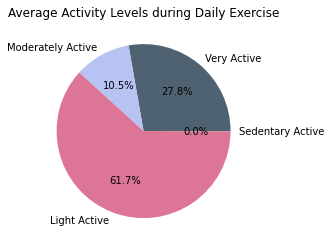

In [ ]:
active = np.array([avg_very_active, avg_moderate_active, avg_light_active, avg_sedentary_active])
def_labels = ["Very Active", "Moderately Active", "Light Active", "Sedentary Active"]
def_colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

plt.pie(active, labels = def_labels, autopct='%1.1f%%', colors = def_colors)
plt.title("Average Activity Levels during Daily Exercise")
plt.show() 

###Analyzing Intensities:

In [ ]:
intensities.head()

,Id,TotalIntensity,AverageIntensity,Date,Time
0,1503960366,20,0.333333,2016-04-12,00:00:00
1,1503960366,8,0.133333,2016-04-12,01:00:00
2,1503960366,7,0.116667,2016-04-12,02:00:00
3,1503960366,0,0.000000,2016-04-12,03:00:00
4,1503960366,0,0.000000,2016-04-12,04:00:00


In [ ]:
intensities['Date'] = pd.to_datetime(intensities['Date'])
intensities["Day"] = pd.to_datetime(intensities['Date']).dt.day

In [ ]:
avg_intensity = intensities
avg_intensity = avg_intensity.groupby("Time", as_index=False).mean()
avg_intensity['Time'] = pd.to_datetime(avg_intensity['Time'], format='%H:%M:%S').dt.strftime('%I:%M%P')
avg_intensity.head()

,Time,Id,TotalIntensity,AverageIntensity,Day
0,12:00am,4.846554e+09,2.129550,0.035493,15.797645
1,01:00am,4.844238e+09,1.419078,0.023651,15.807074
2,02:00am,4.844238e+09,1.043944,0.017399,15.807074
3,03:00am,4.844238e+09,0.443730,0.007396,15.807074
4,04:00am,4.844801e+09,0.633047,0.010551,15.811159


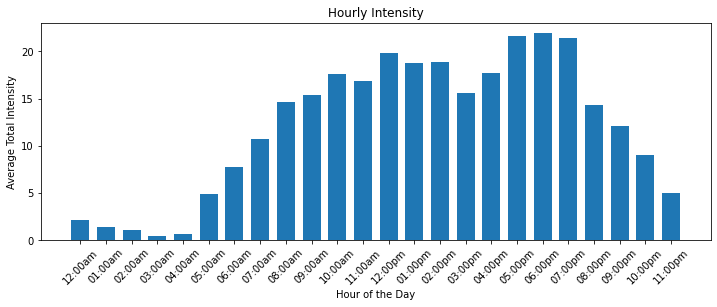

In [ ]:
plot_hourly_intensity = plt.figure(figsize=(12, 4))
plot_hourly_intensity= plt.bar(avg_intensity["Time"], avg_intensity["TotalIntensity"], width = 0.7)
plt.title("Hourly Intensity")
plt.ylabel("Average Total Intensity")
plt.xlabel("Hour of the Day")
plt.xticks(rotation=45)
plt.show()

## Tying it all together:

In [ ]:
total_calories.head()

,Day,Id,Calories
0,1,1503960366,1828
1,1,1624580081,2692
2,1,1644430081,2690
3,1,1844505072,1539
4,1,1927972279,2411


In [ ]:
total_intensity = intensities.groupby(["Day", "Id"], as_index=False).sum()
total_intensity.head()

,Day,Id,TotalIntensity,AverageIntensity
0,1,1503960366,415,6.916667
1,1,1624580081,855,14.250001
2,1,1644430081,203,3.383332
3,1,1844505072,89,1.483334
4,1,1927972279,114,1.900000


In [ ]:
total_steps = steps.groupby(["Day", "Id"], as_index=False).sum()
total_steps.head()

,Day,Id,StepTotal
0,1,1503960366,10602
1,1,1624580081,36019
2,1,1644430081,6132
3,1,1844505072,2573
4,1,1927972279,2704


In [ ]:
calories_and_intensity = pd.merge(total_calories, total_intensity, how="inner", on=["Day", "Id"])

,Day,Id,Calories,TotalIntensity,AverageIntensity
0,1,1503960366,1828,415,6.916667
1,1,1624580081,2692,855,14.250001
2,1,1644430081,2690,203,3.383332
3,1,1844505072,1539,89,1.483334
4,1,1927972279,2411,114,1.900000


In [ ]:
cal_int_steps = pd.merge(calories_and_intensity, total_steps, how="inner", on=["Day", "Id"])
cal_int_steps.head()

,Day,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1,1503960366,1828,415,6.916667,10602
1,1,1624580081,2692,855,14.250001,36019
2,1,1644430081,2690,203,3.383332,6132
3,1,1844505072,1539,89,1.483334,2573
4,1,1927972279,2411,114,1.900000,2704


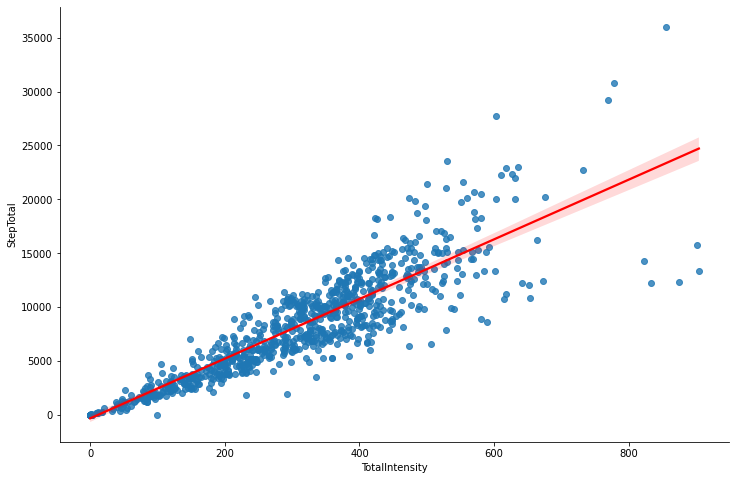

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x = "TotalIntensity", y = "StepTotal", data = cal_int_steps, ax = ax, line_kws={"color": "red"})
sns.despine()
plt.show()

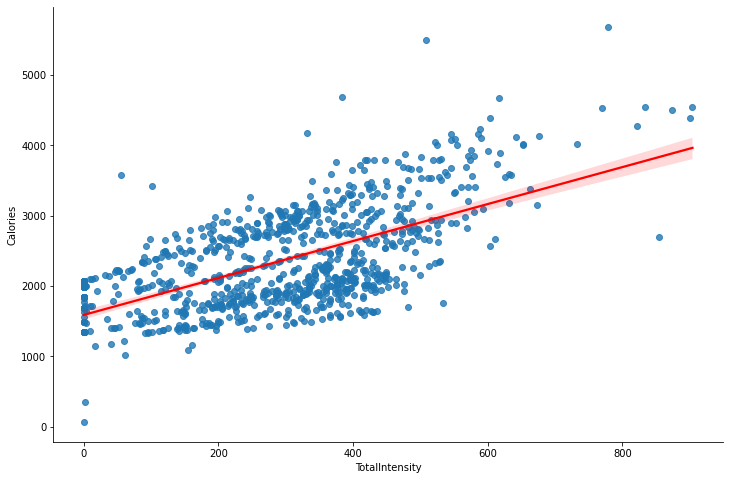

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x = "TotalIntensity", y = "Calories", data = calories_and_intensity, ax = ax, line_kws={"color": "red"})
sns.despine()
plt.show()

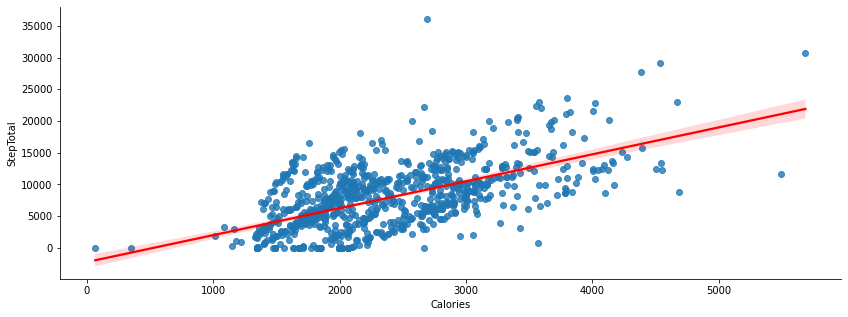

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.regplot(x = "Calories", y = "StepTotal", data = cal_int_steps, ax = ax, line_kws={"color": "red"})
sns.despine()
plt.show()

Text(0.5, 1.0, '\n\nEach Color = A different individual')

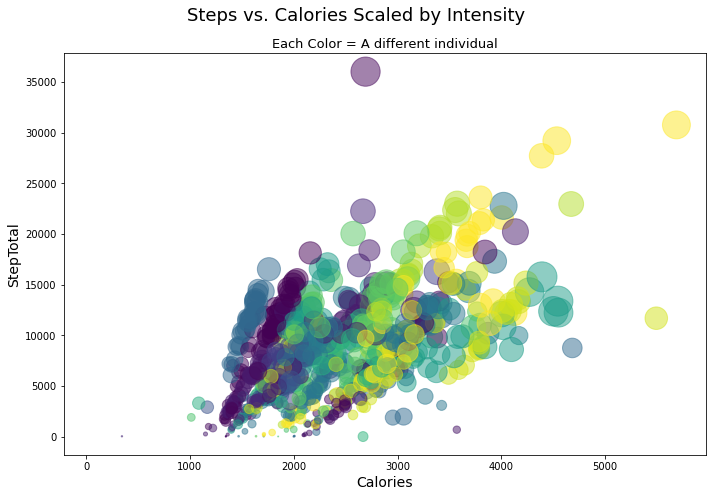

In [ ]:
bubble_cal_int_steps = plt.figure(figsize=(10, 7))
bubble_cal_int_steps= plt.scatter('Calories', 'StepTotal', s='TotalIntensity', c = 'Id', alpha=0.5, data=cal_int_steps)
plt.xlabel("Calories", size =14)
plt.ylabel("StepTotal", size =14)
plt.suptitle("Steps vs. Calories Scaled by Intensity", size=18)
plt.title("\n\nEach Color = A different individual", size=13)

In [ ]:
sleep["Day"] = pd.to_datetime(sleep['Date']).dt.day

In [ ]:
all_measures = pd.merge(cal_int_steps, sleep, how="inner", on=["Day", "Id"])
all_measures["TotalHoursAsleep"] = all_measures["TotalMinutesAsleep"]/60
all_measures = all_measures.drop(["TotalSleepRecords", "Time"], axis = 1)
all_measures.head()

,Day,Id,Calories,TotalIntensity,AverageIntensity,StepTotal,TotalMinutesAsleep,TotalTimeInBed,Date,TotalHoursAsleep
0,1,1503960366,1828,415,6.916667,10602,369,396,2016-05-01,6.150000
1,1,1844505072,1539,89,1.483334,2573,590,961,2016-05-01,9.833333
2,1,2026352035,1449,191,3.183334,3609,527,546,2016-05-01,8.783333
3,1,3977333714,1500,327,5.450003,10414,383,626,2016-05-01,6.383333
4,1,4319703577,1598,67,1.116666,1251,484,500,2016-05-01,8.066667


In [ ]:
conditions = [
    (all_measures['TotalHoursAsleep'] < 7),
    (all_measures['TotalHoursAsleep'] >= 7) & (all_measures['TotalHoursAsleep'] <= 9),
    (all_measures['TotalHoursAsleep'] > 9)
    ]

values = ['Sleep Deprived', 'Healthy Sleep', 'Oversleep']

all_measures['sleep_level'] = np.select(conditions, values)

all_measures.head()

,Day,Id,Calories,TotalIntensity,AverageIntensity,StepTotal,TotalMinutesAsleep,TotalTimeInBed,Date,TotalHoursAsleep,sleep_level
0,1,1503960366,1828,415,6.916667,10602,369,396,2016-05-01,6.150000,Sleep Deprived
1,1,1844505072,1539,89,1.483334,2573,590,961,2016-05-01,9.833333,Oversleep
2,1,2026352035,1449,191,3.183334,3609,527,546,2016-05-01,8.783333,Healthy Sleep
3,1,3977333714,1500,327,5.450003,10414,383,626,2016-05-01,6.383333,Sleep Deprived
4,1,4319703577,1598,67,1.116666,1251,484,500,2016-05-01,8.066667,Healthy Sleep


In [ ]:
less_active = all_measures[all_measures["StepTotal"] <8000]
active = all_measures[all_measures["StepTotal"] >=8000]

In [ ]:
labels_1 = less_active["sleep_level"].value_counts().to_frame()
labels_2 = active["sleep_level"].value_counts().to_frame()

Text(0.5, 1.0, '8000 Steps or More')

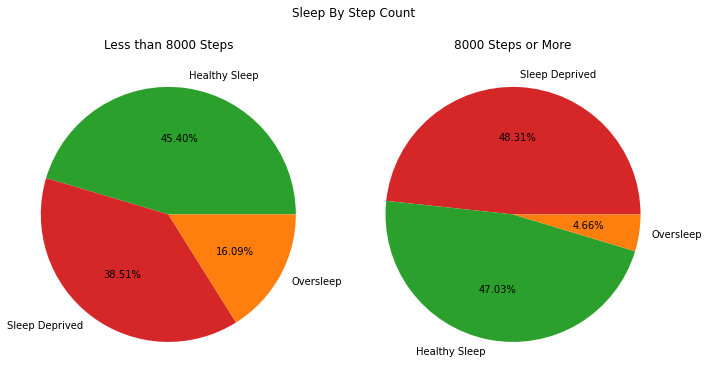

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

colours = {'Oversleep': 'C1',
           'Healthy Sleep': 'C2',
           'Sleep Deprived': 'C3'}

fig.suptitle("Sleep By Step Count")

ax1.pie(labels_1.sleep_level, labels = labels_1.index, colors = [colours[key] for key in labels_1.index], autopct='%1.2f%%')
ax2.pie(labels_2.sleep_level, labels = labels_2.index,colors = [colours[key] for key in labels_2.index], autopct='%1.2f%%')
ax1.set_title('Less than 8000 Steps')
ax2.set_title('8000 Steps or More')